In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
df = pd.read_csv('./merge_request_stats.csv')

In [3]:
df.head()

iid  project_id  weight changed_count  time_to_merge
0  116518      278964       1             5              2
1  116691      278964       1             3              0
2  116581      278964       1             3              2
3    6511     2670515       1             6              3
4  113935      278964       1             2              6

In [4]:
df.duplicated(subset=['iid', 'project_id'], keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
807     True
808     True
809     True
810     True
811     True
Length: 812, dtype: bool

In [5]:
df.drop_duplicates(subset=['iid', 'project_id'], keep='first')

iid  project_id  weight changed_count  time_to_merge
0    116518      278964       1             5              2
1    116691      278964       1             3              0
2    116581      278964       1             3              2
3      6511     2670515       1             6              3
4    113935      278964       1             2              6
..      ...         ...     ...           ...            ...
792   90808      278964      13             6              7
793   90811      278964      13             4             12
801   88912      278964      13            13             36
804   92642      278964      13            10             11
805   76092      278964      13             1              2

[612 rows x 5 columns]

In [6]:
df.groupby("weight")["time_to_merge"].describe()

count       mean        std  min   25%   50%   75%    max
weight                                                           
1       155.0  13.806452  28.675320  0.0  2.00   6.0  13.0  287.0
2       183.0  12.775956  13.124471  0.0  3.00   8.0  18.5   65.0
3       220.0  11.645455  13.598339  0.0  3.00   7.0  14.0   86.0
5       197.0  14.989848  21.395210  0.0  3.00   7.0  21.0  180.0
8        28.0  11.857143  15.383286  1.0  3.75   6.0  12.0   65.0
13       29.0  19.793103  15.653341  1.0  7.00  19.0  26.0   64.0

<Axes: xlabel='weight', ylabel='time_to_merge'>

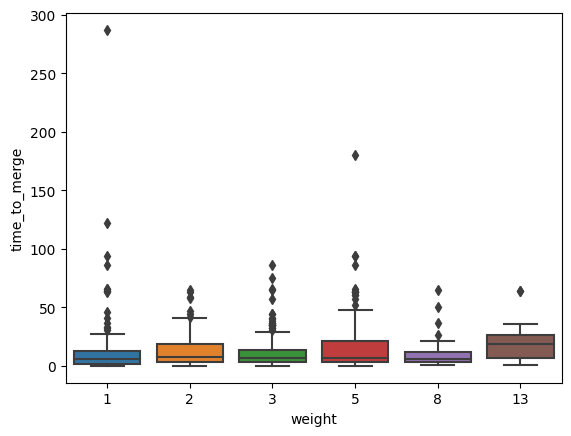

In [7]:
sea.boxplot(x = df['weight'], y=df['time_to_merge'])

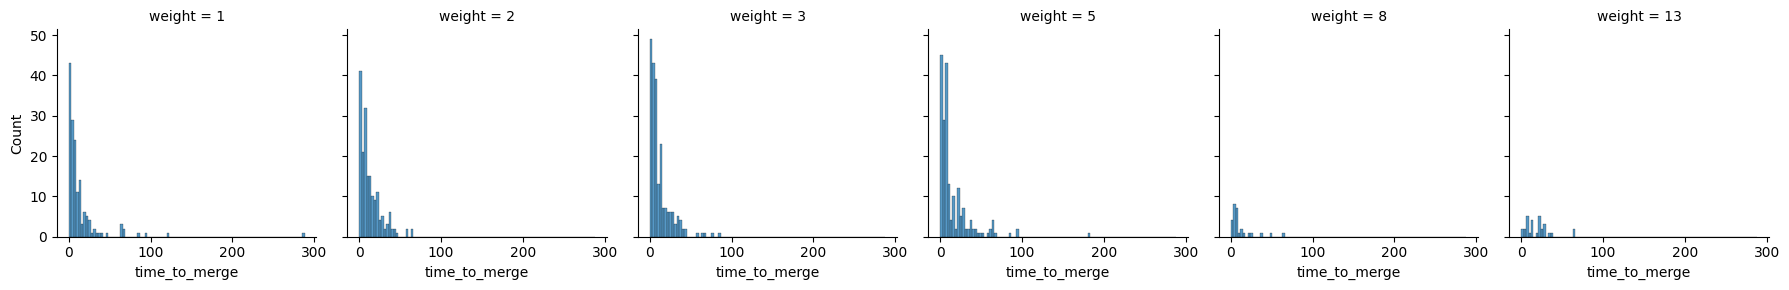

In [8]:
sea.displot(
    df, x="time_to_merge", col="weight",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

In [9]:
# weight 1

w1_q1 = df[df["weight"] == 1]["time_to_merge"].quantile(0.25)
w1_q3 = df[df["weight"] == 1]["time_to_merge"].quantile(0.75)

w1_iqr = w1_q3 - w1_q1

w1_lower_lim = w1_q1 - 1.5 * w1_iqr


w1_upper_lim = w1_q3 + 1.5 * w1_iqr
w1_lower_lim, w1_upper_lim

(-14.5, 29.5)

In [10]:
w1_outliers_low = (df["time_to_merge"] < w1_lower_lim)

w1_outliers_high = (df["time_to_merge"] > w1_upper_lim)

df = df[~(w1_outliers_low | w1_outliers_high)]

In [11]:
# weight 2

w2_q1 = df[df["weight"] == 2]["time_to_merge"].quantile(0.25)
w2_q3 = df[df["weight"] == 2]["time_to_merge"].quantile(0.75)

w2_iqr = w2_q3 - w2_q1

w2_lower_lim = w2_q1 - 1.5 * w2_iqr

w2_upper_lim = w2_q3 + 1.5 * w2_iqr

w2_lower_lim, w1_upper_lim

(-14.75, 29.5)

In [12]:
w2_outliers_low = (df["time_to_merge"] < w2_lower_lim)

w2_outliers_high = (df["time_to_merge"] > w2_upper_lim)

df = df[~(w2_outliers_low | w2_outliers_high)]

In [13]:
# weight 3

w3_q1 = df[df["weight"] == 3]["time_to_merge"].quantile(0.25)
w3_q3 = df[df["weight"] == 3]["time_to_merge"].quantile(0.75)

w3_iqr = w3_q3 - w3_q1

w3_lower_lim = w3_q1 - 1.5 * w3_iqr


w3_upper_lim = w3_q3 + 1.5 * w3_iqr
w3_lower_lim, w3_upper_lim

(-10.5, 25.5)

In [14]:
w3_outliers_low = (df["time_to_merge"] < w3_lower_lim)

w3_outliers_high = (df["time_to_merge"] > w3_upper_lim)

df = df[~(w3_outliers_low | w3_outliers_high)]

In [15]:
# weight 5

w5_q1 = df[df["weight"] == 5]["time_to_merge"].quantile(0.25)
w5_q3 = df[df["weight"] == 5]["time_to_merge"].quantile(0.75)

w5_iqr = w5_q3 - w5_q1

w5_lower_lim = w5_q1 - 1.5 * w5_iqr


w5_upper_lim = w5_q3 + 1.5 * w5_iqr
w5_lower_lim, w5_upper_lim

(-8.5, 19.5)

In [16]:
w5_outliers_low = (df["time_to_merge"] < w5_lower_lim)

w5_outliers_high = (df["time_to_merge"] > w5_upper_lim)

df = df[~(w5_outliers_low | w5_outliers_high)]

In [17]:
# weight 8

w8_q1 = df[df["weight"] == 8]["time_to_merge"].quantile(0.25)
w8_q3 = df[df["weight"] == 8]["time_to_merge"].quantile(0.75)

w8_iqr = w8_q3 - w8_q1

w8_lower_lim = w8_q1 - 1.5 * w8_iqr


w8_upper_lim = w8_q3 + 1.5 * w8_iqr
w8_lower_lim, w8_upper_lim

(-3.0, 13.0)

In [18]:
w8_outliers_low = (df["time_to_merge"] < w8_lower_lim)

w8_outliers_high = (df["time_to_merge"] > w8_upper_lim)

df = df[~(w8_outliers_low | w8_outliers_high)]

In [19]:
# weight 13

w13_q1 = df[df["weight"] == 13]["time_to_merge"].quantile(0.25)
w13_q3 = df[df["weight"] == 13]["time_to_merge"].quantile(0.75)

w13_iqr = w13_q3 - w13_q1

w13_lower_lim = w13_q1 - 1.5 * w13_iqr


w13_upper_lim = w13_q3 + 1.5 * w13_iqr
w13_lower_lim, w13_upper_lim

(2.0, 10.0)

In [20]:
w13_outliers_low = (df["time_to_merge"] < w13_lower_lim)

w13_outliers_high = (df["time_to_merge"] > w13_upper_lim)

df = df[~(w13_outliers_low | w13_outliers_high)]

In [21]:
df

iid  project_id  weight changed_count  time_to_merge
0    116518      278964       1             5              2
2    116581      278964       1             3              2
3      6511     2670515       1             6              3
4    113935      278964       1             2              6
5      6431     2670515       1             2             10
..      ...         ...     ...           ...            ...
792   90808      278964      13             6              7
796   73410      278964      13             3              5
805   76092      278964      13             1              2
809   86112      278964      13             2              6
811   86983      278964      13             8              7

[389 rows x 5 columns]

<Axes: xlabel='weight', ylabel='time_to_merge'>

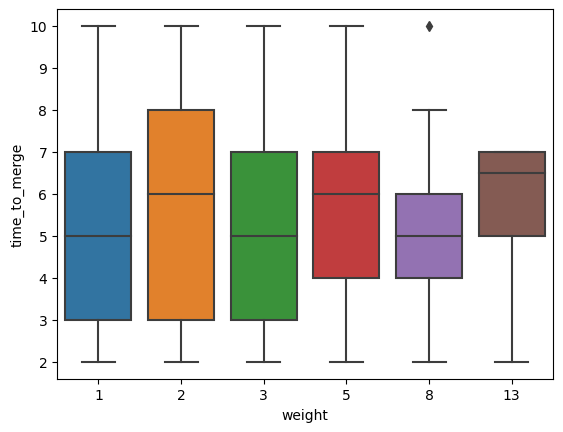

In [22]:
sea.boxplot(x = df['weight'], y=df['time_to_merge'])

In [23]:
df.groupby("weight")["time_to_merge"].describe()

count      mean       std  min  25%  50%  75%   max
weight                                                     
1        77.0  5.090909  2.385161  2.0  3.0  5.0  7.0  10.0
2        78.0  5.717949  2.578117  2.0  3.0  6.0  8.0  10.0
3       113.0  5.230088  2.345242  2.0  3.0  5.0  7.0  10.0
5        96.0  5.645833  2.361887  2.0  4.0  6.0  7.0  10.0
8        17.0  5.235294  2.077541  2.0  4.0  5.0  6.0  10.0
13        8.0  5.750000  1.752549  2.0  5.0  6.5  7.0   7.0